In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools

In [2]:
watercolor = 'lightskyblue'
landcolour = 'papayawhip'

In [3]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]

In [6]:
imin, imax = 520, 720
jmin, jmax = 100, 300
y_slice = np.arange(imin, imax)
x_slice = np.arange(jmin, jmax)

In [25]:
data3d = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/first240_beachingvolume.nc')

In [26]:
beachingvolume = np.ma.masked_array(data3d.Beaching_Volume, data3d.Beaching_Volume < 0.01)

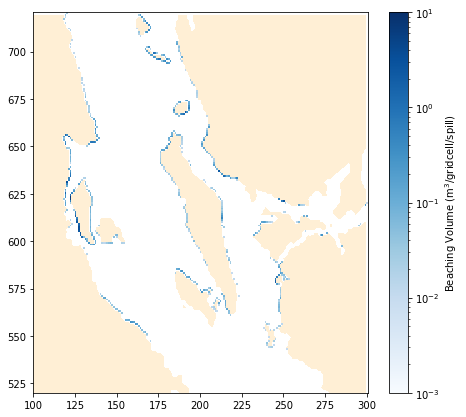

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 7))
viz_tools.plot_land_mask(ax, '/home/sallen/MEOPAR/grid/bathymetry_201702.nc', 
                         xslice=x_slice, yslice=y_slice, color=landcolour)
colours = ax.pcolormesh(np.arange(jmin,jmax+1)+0.75, np.arange(imin,imax+1)+0.75, beachingvolume[imin:imax , jmin:jmax], cmap='Blues', norm=colors.LogNorm(vmin=0.001, vmax=10));
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Beaching Volume (m$^3$/gridcell/spill)')
viz_tools.set_aspect(ax);
fig.savefig('BeachingVolume_for_240.png')